### Import Libs

In [183]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

### Open CSV File
The source of file is kaggle:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [184]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
df.head(10)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Convert Data to numbers

In [185]:
pd.set_option('future.no_silent_downcasting', True)
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1}).infer_objects()
df['Partner'] = df['Partner'].replace({'No': 0, 'Yes': 1}).infer_objects()
df['Dependents'] = df['Dependents'].replace({'No': 0, 'Yes': 1}).infer_objects()
df['PhoneService'] = df['PhoneService'].replace({'No': 0, 'Yes': 1}).infer_objects()
df['MultipleLines'] = df['MultipleLines'].replace({'No': 0, 'Yes': 1,'No phone service':2}).infer_objects()
df['InternetService'] = df['InternetService'].replace({'No': 0, 'DSL': 1,'Fiber optic':2}).infer_objects()
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No': 0, 'Yes': 1,'No internet service':2}).infer_objects()
df['OnlineBackup'] = df['OnlineBackup'].replace({'No': 0, 'Yes': 1,'No internet service':2}).infer_objects()
df['DeviceProtection'] = df['DeviceProtection'].replace({'No': 0, 'Yes': 1,'No internet service':2}).infer_objects()
df['TechSupport'] = df['DeviceProtection'].replace({'No': 0, 'Yes': 1,'No internet service':2}).infer_objects()
df['StreamingTV'] = df['DeviceProtection'].replace({'No': 0, 'Yes': 1,'No internet service':2}).infer_objects()
df['StreamingMovies'] = df['DeviceProtection'].replace({'No': 0, 'Yes': 1,'No internet service':2}).infer_objects()
df['Contract'] = df['Contract'].replace({'Month-to-month': 0, 'One year': 1,'Two year':2}).infer_objects()
df['PaperlessBilling'] = df['Dependents'].replace({'No': 0, 'Yes': 1}).infer_objects()
df['PaymentMethod'] = df['Dependents'].replace({'Electronic check': 0, 'Mailed check': 1,'Bank transfer (automatic)':2}).infer_objects()
df['Churn'] = df['gender'].replace({'No': 0, 'Yes': 1}).infer_objects()
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,0,0,0,0,29.85,29.85,1
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,1,1,1,1,0,0,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,0,0,53.85,108.15,0
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,1,1,1,1,1,0,0,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,0,0,70.70,151.65,1
5,9305-CDSKC,1,0,0,0,8,1,1,2,0,...,1,1,1,1,0,0,0,99.65,820.5,1
6,1452-KIOVK,0,0,0,1,22,1,1,2,0,...,0,0,0,0,0,1,1,89.10,1949.4,0
7,6713-OKOMC,1,0,0,0,10,0,2,1,1,...,0,0,0,0,0,0,0,29.75,301.9,1
8,7892-POOKP,1,0,1,0,28,1,1,2,0,...,1,1,1,1,0,0,0,104.80,3046.05,1
9,6388-TABGU,0,0,0,1,62,1,0,1,1,...,0,0,0,0,1,1,1,56.15,3487.95,0


### Some histogram about the data

array([[<Axes: title={'center': 'tenure'}>]], dtype=object)

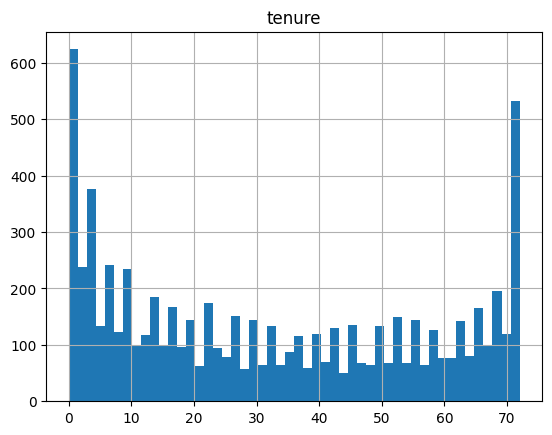

In [186]:
df.hist(column='tenure', bins=50)

array([[<Axes: title={'center': 'MonthlyCharges'}>]], dtype=object)

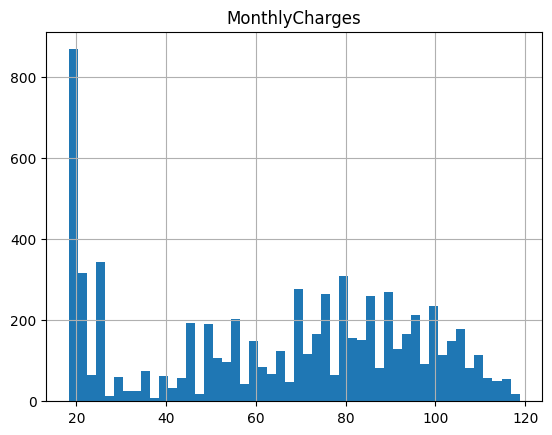

In [187]:
df.hist(column='MonthlyCharges', bins=50)


In [188]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Separate some columns as X

In [189]:
X = df[['SeniorCitizen','Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges']] .values
X[0:5]

array([[ 0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  2.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 29.85],
       [ 0.  ,  0.  ,  0.  , 34.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  , 56.95],
       [ 0.  ,  0.  ,  0.  ,  2.  ,  1.  ,  0.  ,  1.  ,  1.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 53.85],
       [ 0.  ,  0.  ,  0.  , 45.  ,  0.  ,  2.  ,  1.  ,  1.  ,  0.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  , 42.3 ],
       [ 0.  ,  0.  ,  0.  ,  2.  ,  1.  ,  0.  ,  2.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 70.7 ]])

### Separate Churn column as Y

In [190]:
y = df['Churn'].values
y[0:5]

array([1, 0, 0, 0, 1])

### Normalized our X data

In [191]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.43991649,  1.03453023, -0.65401193, -1.27744458, -3.05401039,
         2.11053526, -0.28622272, -0.90358933,  0.28491244, -0.99801581,
        -0.99801581, -0.99801581, -0.99801581, -0.8282069 , -0.65401193,
        -0.65401193, -1.16032292],
       [-0.43991649, -0.96662231, -0.65401193,  0.06632742,  0.32743831,
        -0.93828021, -0.28622272,  0.35138595, -0.99974716,  0.28605897,
         0.28605897,  0.28605897,  0.28605897,  0.37127103, -0.65401193,
        -0.65401193, -0.25962894],
       [-0.43991649, -0.96662231, -0.65401193, -1.23672422,  0.32743831,
        -0.93828021, -0.28622272,  0.35138595,  0.28491244, -0.99801581,
        -0.99801581, -0.99801581, -0.99801581, -0.8282069 , -0.65401193,
        -0.65401193, -0.36266036],
       [-0.43991649, -0.96662231, -0.65401193,  0.51425142, -3.05401039,
         2.11053526, -0.28622272,  0.35138595, -0.99974716,  0.28605897,
         0.28605897,  0.28605897,  0.28605897,  0.37127103, -0.65401193,
        -0.65401193

### Split data for train and test

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 17) (5634,)
Test set: (1409, 17) (1409,)


### Classifier by K=4

In [193]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [194]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

### Find accuracy of K=4

In [195]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6858359957401491
Test set Accuracy:  0.5024840312278211


### Find best K from 1 to 10

In [196]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.51242016, 0.49041874, 0.51454933, 0.50248403, 0.52519517,
       0.50958126, 0.51029099, 0.50958126, 0.51525905])

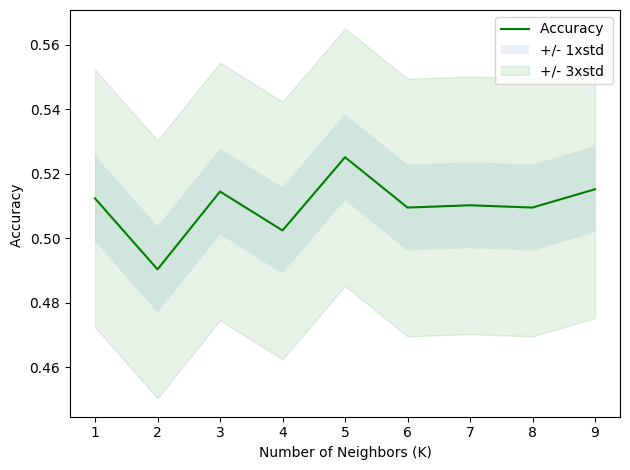

In [197]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### Show the accuracy of the best K

In [198]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.525195173882186 with k= 5
